# **Installing all necessary libraries**

In [ ]:
!pip install chembl_webresource_client
!pip install pandas
!pip install numpy
!pip install scipy
!pip install rdkit
!pip install padelpy
!pip install scikit-learn
!pip install lazypredict

# **Importing all Necessary Libraries**

In [ ]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Lipinski,Descriptors
from padelpy import padeldescriptor
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lazypredict.Supervised import LazyRegressor

# **Search for target protein**

In [8]:
targets=pd.DataFrame(new_client.target.search('acetylcholinesterase'))
targets=targets[targets.organism=='Homo sapiens']
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,28.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,28.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606


# **Selecting and Retrieving Bioactivity Data for "Acetylcholinesterase"**

In [9]:
my_data=new_client.activity.filter(target_chembl_id='CHEMBL220',standard_type='IC50')

In [10]:
data=pd.DataFrame(my_data)
data

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25111481,[],CHEMBL5265203,Inhibition of AChE (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.16
9087,None,None,25402914,[],CHEMBL5303778,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,5.1
9088,None,None,25402962,[],CHEMBL5303826,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,4.0
9089,None,None,25403899,[],CHEMBL5303876,Cross screening panel,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,pIC50,None,UO_0000065,None,4.2


In [11]:
data2=data[['molecule_chembl_id','canonical_smiles','standard_value']].copy()
data2

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
9086,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.0
9087,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28
9088,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.0
9089,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73


# **Handling missing values**

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  9091 non-null   object
 1   canonical_smiles    9056 non-null   object
 2   standard_value      7808 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [13]:
df=data2[data.standard_value.notna()]
df=df[df.canonical_smiles.notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7806 entries, 0 to 9090
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  7806 non-null   object
 1   canonical_smiles    7806 non-null   object
 2   standard_value      7806 non-null   object
dtypes: object(3)
memory usage: 243.9+ KB


# **Data preprocessing**

In [14]:
df['standard_value']=pd.to_numeric(df['standard_value'])

In [15]:
df.describe()

,standard_value
count,7.806000e+03
mean,9.657961e+04
std,1.003502e+06
min,0.000000e+00
25%,9.300000e+01
50%,1.300000e+03
75%,1.125075e+04
max,5.000000e+07


In [16]:
df=df[df.standard_value>0]
df.describe()

,standard_value
count,7.805000e+03
mean,9.659198e+04
std,1.003566e+06
min,5.000000e-06
25%,9.300000e+01
50%,1.300000e+03
75%,1.126000e+04
max,5.000000e+07


# **Labeling Compounds as active,inactive and intermediate**

In [17]:
df['bioactivity_class']=df.standard_value.apply(lambda x: 'active' if x<=1000 else 'inactive' if x>=10000 else 'intermediate')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
9086,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active
9087,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate
9088,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive
9089,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive


# **Convertion of IC50 values to pIC50 to have a Normal distribution of the data**

In [18]:
df['pIC50']=-np.log10(df.standard_value/1000000000)

<Axes: xlabel='standard_value', ylabel='Density'>

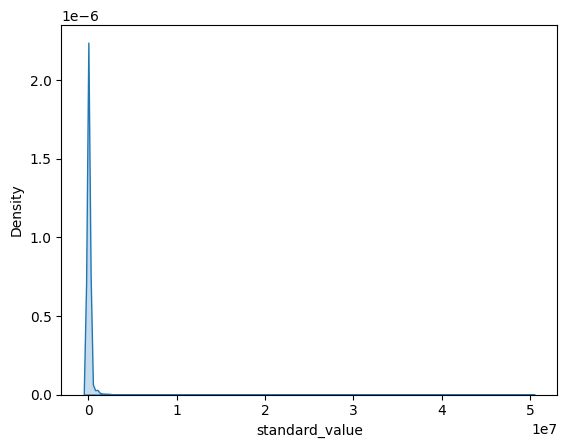

In [19]:
sns.kdeplot(data=df.standard_value,fill=True)

<Axes: xlabel='pIC50', ylabel='Density'>

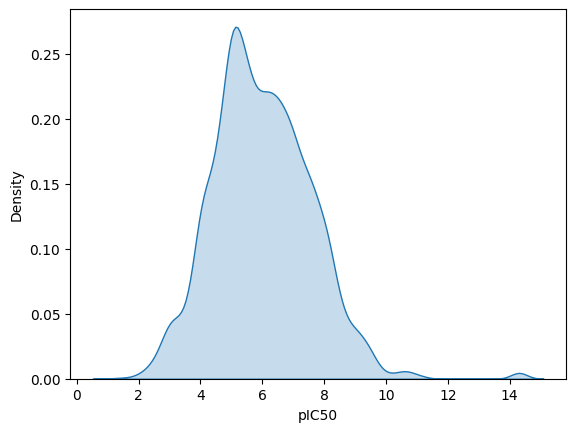

In [20]:
sns.kdeplot(data=df.pIC50,fill=True)

# **Calculation of Lipinski Descriptors**

In [21]:
def lipianski(smiles):

    mol_data=[]
    for i in smiles:
        mol=Chem.MolFromSmiles(i)
        mol_data.append(mol)

    mw=[]
    logp=[]
    numhd=[]
    numha=[]
    for m in mol_data:
        mw.append(Descriptors.MolWt(m))
        logp.append(Descriptors.MolLogP(m))
        numhd.append(Descriptors.NumHDonors(m))
        numha.append(Descriptors.NumHAcceptors(m))

    df['MW']=mw
    df['logP']=logp
    df['numHd']=numhd
    df['numHa']=numha

    return df


In [22]:
df_final=lipianski(df.canonical_smiles)

In [29]:
df_final

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,pIC50,MW,logP,numHd,numHa
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,6.124939,312.325,2.80320,0,6
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,7.000000,376.913,4.55460,0,5
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,4.301030,426.851,5.35740,0,5
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,6.522879,404.845,4.70690,0,5
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,6.096910,346.334,3.09530,0,6
...,...,...,...,...,...,...,...,...,...
9086,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active,6.795880,331.868,5.28790,0,3
9087,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate,5.100000,414.477,3.95740,3,4
9088,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive,4.000000,325.368,1.14840,2,4
9089,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive,4.200000,511.626,5.60034,1,8


# **Excluding "Intermediate" class**

In [30]:
df_final=df[df.bioactivity_class!='intermediate']
df_final

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,pIC50,MW,logP,numHd,numHa
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,6.124939,312.325,2.80320,0,6
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,7.000000,376.913,4.55460,0,5
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,4.301030,426.851,5.35740,0,5
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,6.522879,404.845,4.70690,0,5
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,6.096910,346.334,3.09530,0,6
...,...,...,...,...,...,...,...,...,...
9085,CHEMBL2238280,Cc1ccc(C(=O)/C=C/c2ccc(N3CCCCC3)cc2)s1,130.00,active,6.886057,311.450,4.94292,0,3
9086,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.00,active,6.795880,331.868,5.28790,0,3
9088,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.00,inactive,4.000000,325.368,1.14840,2,4
9089,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive,4.200000,511.626,5.60034,1,8


# **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

## **Frequency plot of the two bioactivity classes**

Text(0, 0.5, 'Frequency')

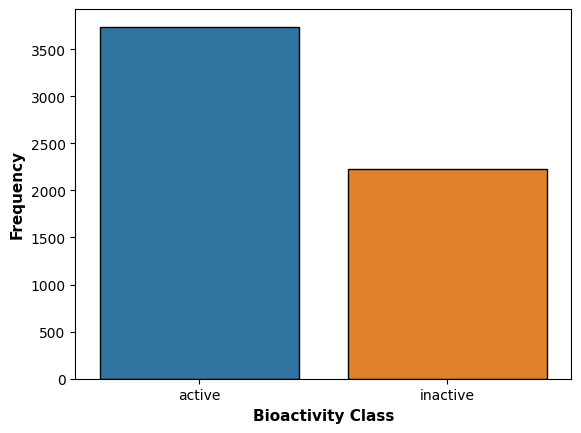

In [31]:
sns.countplot(data=df_final,x=df_final.bioactivity_class,edgecolor='black',hue='bioactivity_class')
plt.xlabel('Bioactivity Class',fontsize=11,fontweight='bold')
plt.ylabel('Frequency',fontsize=11,fontweight='bold')

## **Scatterplot of MW vs logP.**
## **The two classes are occupying <span style="color:red;">similar regions</span> in this chemical descriptor space(Molecular Weight vs LogP).**

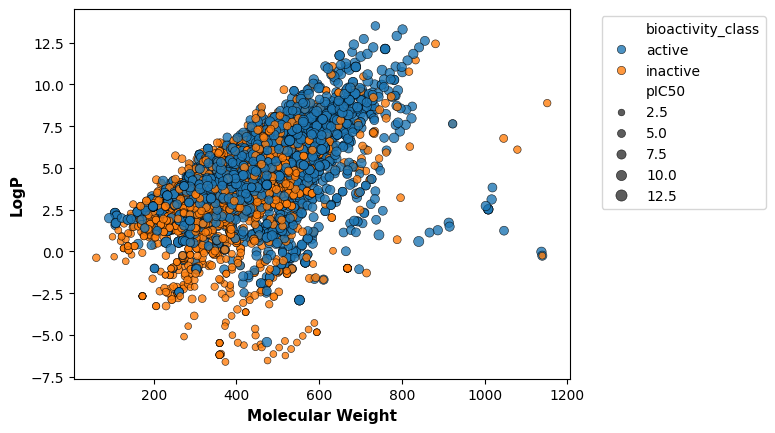

In [32]:
sns.scatterplot(data=df_final,x='MW',y='logP',hue='bioactivity_class',size='pIC50',edgecolor='black',alpha=0.8)
plt.xlabel('Molecular Weight',fontsize=11,fontweight='bold')
plt.ylabel('LogP',fontsize=11,fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

# **Statistical analysis | Mann-Whitney U Test**

In [33]:
df_active=df_final[df_final.bioactivity_class=='active']
df_inactive=df_final[df_final.bioactivity_class=='inactive']

In [34]:
def mannwhitney(input):
    stat,p_value=mannwhitneyu(df_active[input],df_inactive[input])
    mwu={
        'Type':input,
        'Statistics':stat,
        'P Value':p_value,
        'Significance Level':0.05,
        'Interpretation':['Reject Null hupothesis' if p_value <= 0.05 else "Don't Reject Null Hypothesis"]
    }
    mwu=pd.DataFrame(mwu)
    return mwu

## **pIC50 Value**

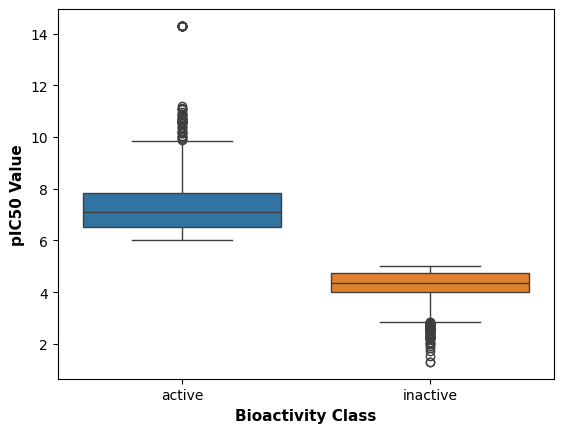

In [35]:
sns.boxplot(data=df_final,x='bioactivity_class',y=df_final.pIC50,hue='bioactivity_class')
plt.xlabel('Bioactivity Class',fontsize=11,fontweight='bold')
plt.ylabel('pIC50 Value',fontsize=11,fontweight='bold');

In [36]:
mannwhitney('pIC50')

,Type,Statistics,P Value,Significance Level,Interpretation
0,pIC50,8317050.0,0.0,0.05,Reject Null hupothesis


## **MW**

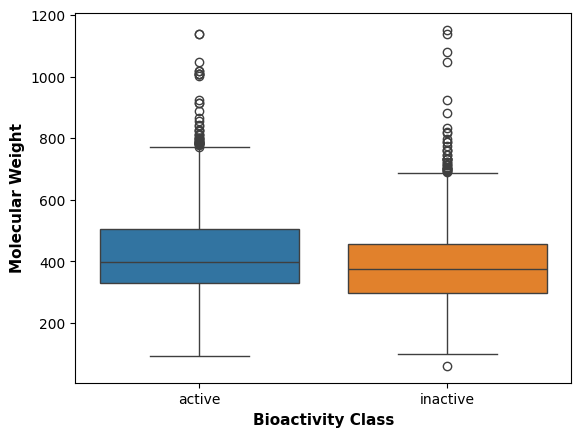

In [37]:
sns.boxplot(data=df_final,x='bioactivity_class',y=df_final.MW,hue='bioactivity_class')
plt.xlabel('Bioactivity Class',fontsize=11,fontweight='bold')
plt.ylabel('Molecular Weight',fontsize=11,fontweight='bold');

In [38]:
mannwhitney('MW')

,Type,Statistics,P Value,Significance Level,Interpretation
0,MW,4772649.0,1.270346e-21,0.05,Reject Null hupothesis


## **logP**

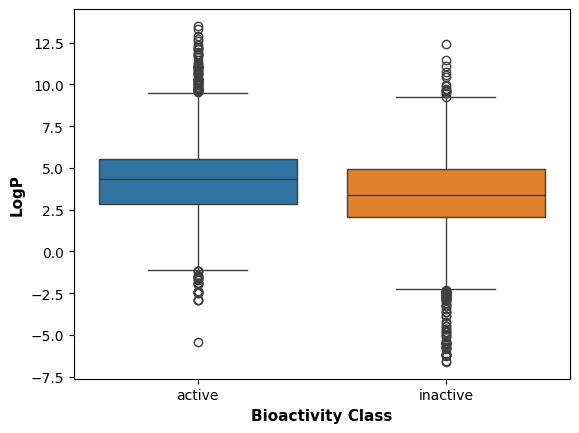

In [39]:
sns.boxplot(data=df_final,x='bioactivity_class',y=df_final.logP,hue='bioactivity_class')
plt.xlabel('Bioactivity Class',fontsize=11,fontweight='bold')
plt.ylabel('LogP',fontsize=11,fontweight='bold');

In [40]:
mannwhitney('logP')

,Type,Statistics,P Value,Significance Level,Interpretation
0,logP,5163689.5,4.242067e-55,0.05,Reject Null hupothesis


## **NumHdonors**

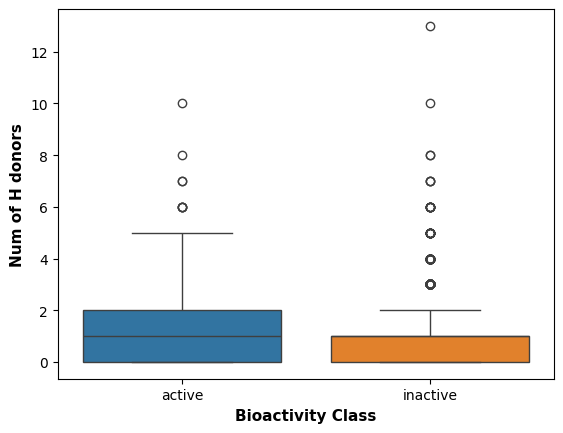

In [41]:
sns.boxplot(data=df_final,x='bioactivity_class',y=df_final.numHd,hue='bioactivity_class')
plt.xlabel('Bioactivity Class',fontsize=11,fontweight='bold')
plt.ylabel('Num of H donors',fontsize=11,fontweight='bold');

In [42]:
mannwhitney('numHd')

,Type,Statistics,P Value,Significance Level,Interpretation
0,numHd,4504594.0,1.292802e-08,0.05,Reject Null hupothesis


## **NumHacceptors**

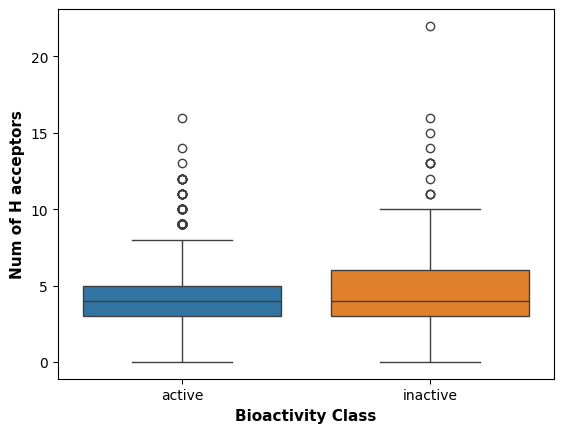

In [43]:
sns.boxplot(data=df_final,x='bioactivity_class',y=df_final.numHa,hue='bioactivity_class')
plt.xlabel('Bioactivity Class',fontsize=11,fontweight='bold')
plt.ylabel('Num of H acceptors',fontsize=11,fontweight='bold');

In [44]:
mannwhitney('numHa')

,Type,Statistics,P Value,Significance Level,Interpretation
0,numHa,4172961.0,0.81957,0.05,Don't Reject Null Hypothesis


# **Interpretation of Statistical Result**
### **Box Plots**
### **pIC50 Values:**
### Taking a look at pIC50 values, the **actives** and **inactives** displayed statistically significant difference, which is to be expected since thresholdvalues **(IC50 < 1,000 nM = Actives while IC50 › 10,000 nM = Inactives, corresponding to pIC50 › 6 = Actives and pIC50 < 5 =Inactives)** were used to define actives and inactives.
### **Lipianski's Descriptors:**
### Of the 4 Lipinski's descriptors **(MW, LogP, NumHDonors and NumHAcceptors)**, only **numHa exhibited no difference** between the actives and inactives while the other 3 descriptors **(MW, NumHDonors and NumHAcceptors)** shows **statistically significant difference** between actives and inactives.

# **Generating Molecular Fingerprint Descriptors via PadelPy (Python Wrapper for PaDEL-Descriptor)**

In [ ]:
df_smi=df_final[['canonical_smiles','molecule_chembl_id']]
df_smi

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
9085,Cc1ccc(C(=O)/C=C/c2ccc(N3CCCCC3)cc2)s1,CHEMBL2238280
9086,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,CHEMBL2238282
9088,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,CHEMBL4635134
9089,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,CHEMBL4639128


In [50]:
df_smi.to_csv('smiles_id.smi',sep='\t',index=False,header=False)

In [ ]:
! wget https://github.com/fahmidhasann/Drug-Discovery-Using-Machine-Learning/raw/refs/heads/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

In [160]:
import glob
files=glob.glob('*.xml')
files=sorted(files)
files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [ ]:
fp_list=['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [ ]:
fingerprints=dict(zip(fp_list,files))
fingerprints

{'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml',
 'Substructure': 'SubstructureFingerprinter.xml'}

In [ ]:
padeldescriptor(
    mol_dir='smiles_id.smi',
    d_file='fingerprint.csv',
    removesalt=True,
    standardizenitro=True,
    descriptortypes=fingerprints['PubChem'],
    threads=2,
    fingerprints=True,
    detectaromaticity=True,
    standardizetautomers=True
)

In [99]:
df_fp=pd.read_csv('fingerprint.csv')
df_fp

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,CHEMBL2238280,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5959,CHEMBL2238282,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5960,CHEMBL4635134,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5961,CHEMBL4639128,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Preparration of X and Y Data matrices for Model Building**

## **X**

In [100]:
X=df_fp.drop(columns='Name',axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5959,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5960,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5961,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y**

In [101]:
Y=df_final[['pIC50']]
Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
9085,6.886057
9086,6.795880
9088,4.000000
9089,4.200000


In [102]:
X.shape

(5963, 881)

In [103]:
Y.shape

(5963, 1)

# **Removing Low Varience Features**

In [104]:
selction=VarianceThreshold(threshold=0.1)
X=selction.fit_transform(X)

In [105]:
X.shape

(5963, 210)

# **Spliting data in 80/20 ratio**

In [106]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [107]:
X_train.shape,Y_train.shape

((4770, 210), (4770, 1))

In [108]:
X_test.shape,Y_test.shape

((1193, 210), (1193, 1))

# **Building a Regression Model using Random Forest Algorithm**

In [109]:
model=RandomForestRegressor(n_estimators=500,random_state=42)
model.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=500, random_state=42)

In [115]:
r2=model.score(X_test,Y_test)
print(f"Model prediction score: {r2}")

Model prediction score: 0.7354284645809362


In [116]:
Y_pred=model.predict(X_test)

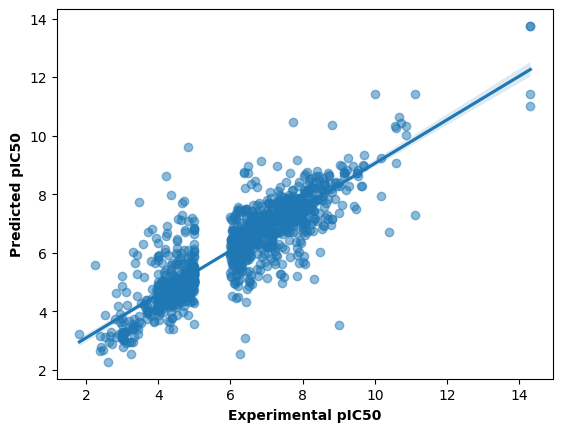

In [122]:
sns.regplot(x=Y_test,y=Y_pred,scatter_kws={'alpha':0.5})
plt.xlabel('Experimental pIC50',fontweight='bold')
plt.ylabel('Predicted pIC50',fontweight='bold');

### **pIC50 values between 5 to 6 (Intermediate) was excluded from training and testing dataset**

# **Comparision of different ML algorithms using the Lazypredict library**

In [ ]:
reg=LazyRegressor(verbose=0,custom_metric=None,ignore_warnings=True)
performance_metrics,trained_models=reg.fit(X_train,X_test,Y_train,Y_test)

In [ ]:
filtered=performance_metrics[(performance_metrics['R-Squared']>=0)&(performance_metrics['R-Squared']<=1)]
filtered

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.69,0.72,0.94,5.50
XGBRegressor,0.67,0.71,0.96,0.39
BaggingRegressor,0.66,0.69,0.99,0.64
LGBMRegressor,0.63,0.68,1.02,0.39
HistGradientBoostingRegressor,0.63,0.67,1.03,1.45
MLPRegressor,0.61,0.65,1.05,7.75
KNeighborsRegressor,0.59,0.64,1.07,0.15
ExtraTreesRegressor,0.56,0.61,1.12,7.99
SVR,0.55,0.60,1.13,4.13


<Axes: xlabel='R-Squared', ylabel='Model'>

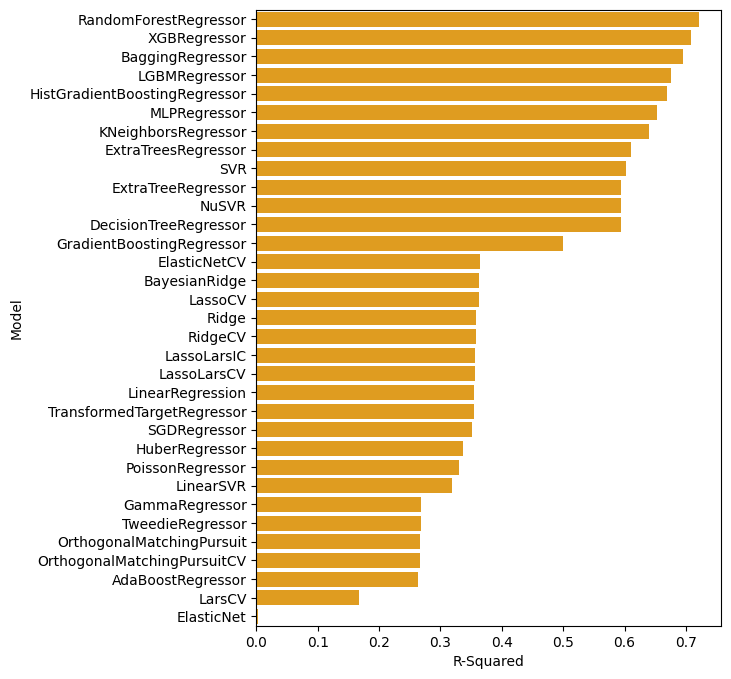

In [56]:
plt.figure(figsize=(6,8))
sns.barplot(y=filtered.index,x=filtered['R-Squared'],color='orange')

# **Saving Model**

In [119]:
import pickle

In [121]:
pickle.dump(model,open('acetocholinesterase_model.pkl','wb'))